# Titanik gemisinde hayatta kalanları tahmin eden model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("ttrain.csv")

In [3]:
df2=pd.read_csv("ttest.csv")

# EDA- Exploraty Data Analysis

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2.head() # survived sütunu buurada eklenmemiş yani üsttekiyle eğitip buurayı tahmin edeceğiz

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C


In [7]:
df1.isnull().sum() # boş verileri doldurmamız lazım

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# DRY - Dont repeat yourself bir işi 2 kez yapma! bu yüzden 2 datayı birleştiricez altta

In [10]:
df1.shape, df2.shape

((891, 12), (418, 11))

In [11]:
df=df1.append(df2)  #birleştirme işlemi

C:\Users\KAYA\AppData\Local\Temp\ipykernel_11852\918054475.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)  #birleştirme işlemi


In [12]:
# df=pd.concat(df1,df2) gelecekte böyle yazılacakmış birlesştirme işlemi

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
#boş verileri doldurma
#1-mean 2-median 3-KNN(komşu) 4-regression 5-Fforward 6-mode

In [16]:
df["Fare"].mean(),df["Fare"].min(),df["Fare"].max(),df["Fare"].std()

(33.29547928134557, 0.0, 512.3292, 51.75866823917414)

In [17]:
#fillna boş verileri doldrur

In [18]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean()) #fareyi ortalama ile doldurduk

<Axes: xlabel='Embarked', ylabel='count'>

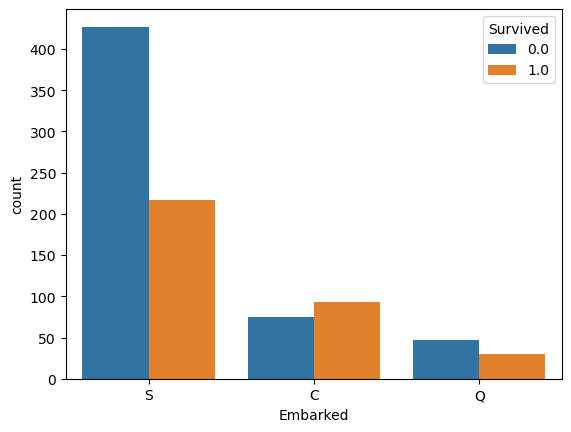

In [19]:
sns.countplot(x=df["Embarked"],hue=df['Survived'])

In [20]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [21]:
df["Embarked"].value_counts(normalize=True) #yüzde

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [22]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [23]:
df["Embarked"]=df["Embarked"].fillna('s') # en çok tekrar eden yöntem ile boşlukları doldurduk

In [24]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [25]:
df.shape

(1309, 12)

In [26]:
#cabin sütununu sileceğiz

In [27]:
#del df["Cabin"] #kabin sütnunu sildik
#df.drop('Cabin', axis=1, inplace=True) # silmek için 2. yöntem
#axis=0 satır siliyor axis=1 sütn siliyor

In [28]:
del df["Cabin"]

In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [30]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
741,742,0.0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.85,S


### Feaure Engineering öznitelik veride olmayıp sonradan üretilen sütunlar

In [31]:
# yapacağımız şey isimden ünvanları çıkarmak

In [32]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False ) #noktada dur

In [33]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
828,829,1.0,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.75,Q,Mr


In [34]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [35]:
#sayıları az olan title ları mr, mis ve mrs nin içine katıyoruz

In [38]:
df["Title"]=df["Title"].replace(['Ms','Mlle'],'Miss')
df["Title"]=df["Title"].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df["Title"]=df["Title"].replace(['Rev','Jonkheer','Don','Sir','Major','Dr','Capt','Col'],'Mr')

In [39]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [43]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [45]:
df.groupby('Sex')["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [46]:
df.groupby('Title')["Age"].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [47]:
df["Age"]=df["Age"].fillna(df.groupby('Title')["Age"].transform('median'))

In [48]:
#yukarıda boşlukları doldurduk median yani orta değer ortalamayla eş değer 
#hepsi aynı sırada olmadığı için transform kullandık

In [50]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [51]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
219,220,0.0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5,S,Mr


In [52]:
#passengerld, name , ticket listeden çıkarıyoruz çünkü etkilemiyor

In [53]:
df.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)
#birden fazla sütun sileceğimiz zaman drop kullanırız.

In [55]:
df['Family']=df['SibSp']+df['Parch']+1 
# yeni sütun oluşturacağız aile sayısı ne kadar fazla ise kurtulma şansın düşüyor
#sondaki +1 kendimiz

In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [57]:
data=pd.get_dummies(df,drop_first=True)

In [58]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Embarked_s,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,0,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,0,1,0


In [63]:
data.to_csv('titanichazırveri.csv') # yukarıyı bir daha yazmamak için kayıt ettik

In [64]:
#veri hazıe şimdi x ve y yi belirleyeceğiz 

In [65]:
train=data[:891] #0 dan baslayıp 891. satır kadar train
test=data[891:]  #891. satırdan sona kadar

In [67]:
x=train.drop('Survived',axis=1) # x ten survived sütununu çıkar
y=train['Survived']

In [69]:
test.head() #srvived kısmı boş y yi sonuç olarak belirledik

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Embarked_s,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,0,1


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
d=DecisionTreeClassifier()

In [74]:
model=d.fit(x,y)

In [75]:
tahmin=model.predict(test.drop('Survived',axis=1))

In [76]:
sonuc=pd.DataFrame()

In [81]:
sonuc['PassengerId']=df2['PassengerId']
sonuc['Survived']=tahmin


In [85]:
sonuc

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
sonuc['Survived']=sonuc['Survived'].astype('int32')

In [84]:
sonuc.to_csv('titanictahmin.csv', index=False)